<a href="https://colab.research.google.com/github/erinmcmullen/CS167-Notes/blob/main/Day10_Artificial_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Day10 Artificial Neural Networks

We're going to start off by using sklearn MLP to implement a multilayer perceptron, and then we're going to use a deep learning framework, Tensorflow with Keras to build a neural network.

__Documentation__: 
- [`sklearn.neural_network.MLPClassifier()`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html#sklearn.neural_network.MLPClassifier)
- [`sklearn.neural_network.MLPRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor)

## Data Preparation
- Mount Drive
- Load in `irisData.csv`
- use `train_test_split` to split data 
- normalize using `slkearn.preprocessing.StandardScaler`

In [2]:
from google.colab import drive
import pandas
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
data = pandas.read_csv('/content/drive/MyDrive/Datasets/irisData.csv')
data.head()

,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
import pandas
import numpy
from sklearn.model_selection import train_test_split

#Split the dataset
predictors = data.columns.drop('species')
target = "species"
train_data, test_data, train_sln, test_sln = train_test_split(data[predictors], data[target], test_size = 0.2, random_state=41)

#Normalize Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

## Build a MLP using `sklearn`

Accuracy:  0.9


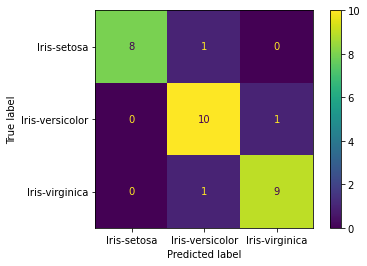

In [5]:
# Set up MLP
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

mlp = MLPClassifier(random_state=0,hidden_layer_sizes = (100,), max_iter = 800)
mlp.fit(train_data_norm,train_sln)
predictions = mlp.predict(test_data_norm)

print("Accuracy: ", metrics.accuracy_score(test_sln,predictions))

# Confusion Matrix
vals = data[target].unique() ## possible classification values (species)
conf_mat = metrics.confusion_matrix(test_sln, predictions, labels=vals)

#print(pandas.DataFrame(conf_mat, index = "True " + vals, columns = "Pre " + vals))

disp = ConfusionMatrixDisplay(confusion_matrix=conf_mat,display_labels=mlp.classes_)
disp.plot()
plt.show()

## In-Class Exercise #1:

1. Read in the Boston Housing dataset
2. Normalize your data
3. Use a [MLPRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html) to predict the price of a house 'MEDV'
4. Play around with changing the parameters, see what the best R2 score you can get is. 

In [28]:
# Your code goes here for the In-Class Exercise
# 1. Read in the Boston Housing dataset
import pandas
housing_data = pandas.read_csv('/content/drive/MyDrive/Datasets/boston_housing.csv') 

# clean the data
housing_data['CRIM'].fillna(housing_data['CRIM'].mean(),inplace=True)
housing_data['ZN'].fillna(housing_data['ZN'].mean(),inplace=True)
housing_data['INDUS'].fillna(housing_data['INDUS'].mean(),inplace=True)
housing_data['CHAS'].fillna(housing_data['CHAS'].mean(),inplace=True)
housing_data['AGE'].fillna(housing_data['AGE'].mean(),inplace=True)
housing_data['LSTAT'].fillna(housing_data['LSTAT'].mean(),inplace=True)

#Split the dataset
predictors = housing_data.columns.drop('MEDV')
target = "MEDV"
train_data, test_data, train_sln, test_sln = train_test_split(housing_data[predictors], housing_data[target], test_size = 0.2, random_state=0)


In [29]:
#2. Normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(train_data)
train_data_norm = scaler.transform(train_data)
test_data_norm = scaler.transform(test_data)

In [45]:
#3. Use a MLPRegressor to predict the price of a house 'MEDV'
from sklearn.neural_network import MLPRegressor
from sklearn import metrics
mlp_housing = MLPRegressor(learning_rate='invscaling',hidden_layer_sizes=(500,), max_iter=1000)
mlp_housing.fit(train_data_norm,train_sln)
predictions = mlp_housing.predict(test_data_norm)

print("R2: ", metrics.r2_score(test_sln,predictions))


R2:  0.6862848658882874


In [11]:
#4. Play around with the parameters

# Introducing Deep Learning Frameworks

Go ahead and go up to 'Runtime', and select 'change runtime type' from the dropdown list, select 'GPU'. If you complete this step correctly, the following code should say `Found GPU at: /device:GPU:0` or something similar.

In [2]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


# Iris Dataset with Keras

In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)

from keras.models import Sequential
from keras.layers import Dense

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import numpy

# we're going to use the iris dataset, but load it from sklearn 
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# One hot encoding
enc = OneHotEncoder()
Y = enc.fit_transform(y[:, numpy.newaxis]).toarray()

# Split the data set into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

#normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [4]:
# display a row of data
print(X_train_norm[0,:])
print(Y_train[0,:])

[ 0.37346331 -0.58519388  0.54075378  0.74234434]
[0. 0. 1.]


In [5]:
#build our neural network model
n_features = X.shape[1] #X generally stands for our predictors
n_classes = Y.shape[1] #Y generally stands for our target

model = Sequential(name='iris_1')
model.add(Dense(2, input_dim=n_features, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(n_classes, activation='softmax'))

from sklearn.metrics import r2_score

# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics=['accuracy'])
model.summary()

Model: "iris_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 10        
                                                                 
 dense_1 (Dense)             (None, 2)                 6         
                                                                 
 dense_2 (Dense)             (None, 3)                 9         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


## Keras Documentation: 
https://keras.io/api/models/model_training_apis/ 

In [6]:
# train the model
history = model.fit(X_train_norm, Y_train, validation_split=0.2, batch_size=15, epochs=10) #add verbose = 0 to make output minimal

# cross-validation; make predictions and get error
print("----"*30)
mse, acc =  model.evaluate(X_test_norm, Y_test)
print('Mean Squared Error:',mse)
print('Test accuracy:', acc)

Epoch 1/10
7/7 [==============================] - 5s 62ms/step - loss: 0.2160 - accuracy: 0.2812 - val_loss: 0.2115 - val_accuracy: 0.4167
Epoch 2/10
7/7 [==============================] - 0s 19ms/step - loss: 0.2159 - accuracy: 0.4271 - val_loss: 0.2113 - val_accuracy: 0.4167
Epoch 3/10
7/7 [==============================] - 0s 16ms/step - loss: 0.2157 - accuracy: 0.4271 - val_loss: 0.2111 - val_accuracy: 0.4167
Epoch 4/10
7/7 [==============================] - 0s 20ms/step - loss: 0.2156 - accuracy: 0.4271 - val_loss: 0.2109 - val_accuracy: 0.4167
Epoch 5/10
7/7 [==============================] - 0s 62ms/step - loss: 0.2155 - accuracy: 0.4271 - val_loss: 0.2107 - val_accuracy: 0.4167
Epoch 6/10
7/7 [==============================] - 0s 14ms/step - loss: 0.2153 - accuracy: 0.4271 - val_loss: 0.2104 - val_accuracy: 0.4167
Epoch 7/10
7/7 [==============================] - 0s 26ms/step - loss: 0.2152 - accuracy: 0.4375 - val_loss: 0.2103 - val_accuracy: 0.4167
Epoch 8/10
7/7 [===========

## 👀 Take a closer look: 

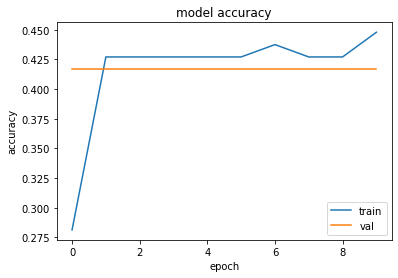

In [7]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

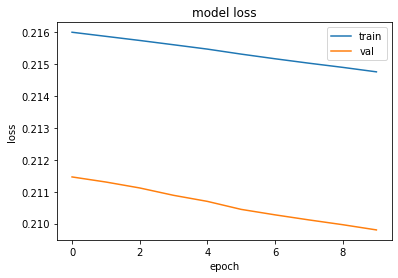

In [8]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# Boston Housing Dataset with Keras

In [9]:
from keras.datasets import boston_housing

# we're going to use the Bosting housing dataset, but load it from keras 
housing_data = boston_housing.load_data(test_split=0.2) #it comes with it's own test/train split :) 
(X_train, Y_train), (X_test, Y_test) = housing_data

57026/57026 [==============================] - 0s 0us/step


In [10]:
# normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_norm = scaler.transform(X_train)
X_test_norm = scaler.transform(X_test)

In [11]:
### need to execute this to get access to RSquare function
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 25.3 MB/s eta 0:00:00


In [12]:
from keras import models
from keras import layers

from tensorflow_addons.metrics import RSquare

#build our model
n_features = X_train.shape[1] # get the number of input values for the input layer

model = Sequential(name='boston_housing1')   #initialize the model

#add some layers. Dense is a fully connected layer
model.add(layers.Dense(64, input_dim= n_features, activation='relu'))
model.add(layers.Dense(64, activation='relu'))

#Since we are doing a regressions, we only want one value as an ouput, so our last layer has a Dense layer with 1 neuron.
model.add(layers.Dense(1)) #default activation function is "linear"

from sklearn.metrics import r2_score
# Compile model
model.compile(loss='mean_squared_error',
              optimizer='sgd', 
              metrics= RSquare()) #tf.keras.losses.MeanSquaredError()
model.summary()

Model: "boston_housing1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 64)                896       
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


In [13]:
# train the model
history = model.fit(X_train_norm, Y_train, epochs=50, validation_split=0.1, batch_size=15, verbose=1)

print("----"*30)

# cross-validation; make predictions and get error
test_mse_score, test_r2_score = model.evaluate(X_test_norm, Y_test)
print('MSE:', test_mse_score)
print('r2:', test_r2_score)

Epoch 1/50
25/25 [==============================] - 1s 10ms/step - loss: 320.0932 - r_square: -2.5860 - val_loss: 101.5470 - val_r_square: -1.3793
Epoch 2/50
25/25 [==============================] - 0s 4ms/step - loss: 125.0838 - r_square: -0.4013 - val_loss: 229.0548 - val_r_square: -4.3668
Epoch 3/50
25/25 [==============================] - 0s 5ms/step - loss: 101.5623 - r_square: -0.1378 - val_loss: 24.0895 - val_r_square: 0.4356
Epoch 4/50
25/25 [==============================] - 0s 6ms/step - loss: 39.9041 - r_square: 0.5530 - val_loss: 41.6273 - val_r_square: 0.0247
Epoch 5/50
25/25 [==============================] - 0s 7ms/step - loss: 43.1398 - r_square: 0.5167 - val_loss: 41.2536 - val_r_square: 0.0334
Epoch 6/50
25/25 [==============================] - 0s 5ms/step - loss: 40.6540 - r_square: 0.5446 - val_loss: 12.1190 - val_r_square: 0.7160
Epoch 7/50
25/25 [==============================] - 0s 4ms/step - loss: 14.1996 - r_square: 0.8409 - val_loss: 10.5788 - val_r_square: 0.

In [14]:
history.history #this will show you what was saved in the history variable

{'loss': [320.0931701660156,
  125.08384704589844,
  101.56227111816406,
  39.904117584228516,
  43.13978958129883,
  40.654022216796875,
  14.199627876281738,
  19.022098541259766,
  36.49755859375,
  34.765869140625,
  15.137974739074707,
  1430.334716796875,
  112.813232421875,
  35.63661193847656,
  30.632831573486328,
  34.500152587890625,
  38.76122283935547,
  31.676258087158203,
  29.501134872436523,
  27.62717056274414,
  27.81285858154297,
  28.413280487060547,
  30.19886016845703,
  30.889360427856445,
  27.927223205566406,
  28.506797790527344,
  28.137853622436523,
  27.86566734313965,
  943.8211059570312,
  232.0523223876953,
  66.73692321777344,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan,
  nan],
 'r_square': [-2.5859522819519043,
  -0.40129363536834717,
  -0.13778579235076904,
  0.552962064743042,
  0.5167125463485718,
  0.5445610284805298,
  0.8409243822097778,
  0.7868984937667847,
  0.5

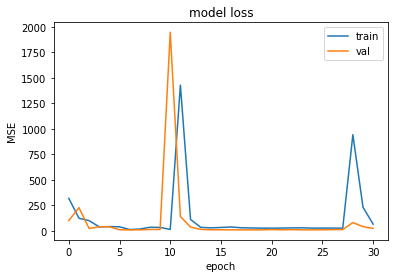

In [15]:
import pandas
#pandas.DataFrame(history.history).plot(figsize=(8,5), title='Boston Housing')
#plt.show()

import keras
from matplotlib import pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

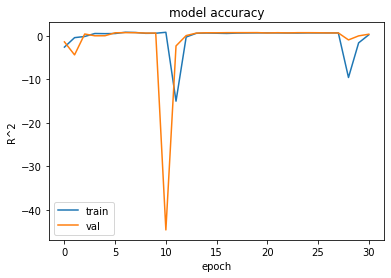

In [16]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['r_square'])
plt.plot(history.history['val_r_square'])
plt.title('model accuracy')
plt.ylabel('R^2')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

# In Class Exercise #2
What parameters from the models above do you think you can/should change? 


Try these
- Change the number of neurons in each layer.  
- Add a layer to the model.
- Change the activation function of the model, [here is the documentation](https://keras.io/api/layers/activations/)
- Change the optimizer, [here is the documentation](https://keras.io/api/optimizers/) with a list of options
- look at the [metrics](https://keras.io/api/metrics/) try adding another metric.